# Exploratory Data Analysis
### Franchise EDA
##### Steps for Analysis:
1. Data Upload
2. Data Cleaning/Quality Check
3. Data Wrangling
4. Univariate/Bivariate/Multivariate Exploration
5. Address Stakeholder Questions and Key Takeaways

# 1. Data Upload

In [1]:
#Import necessary packages for exploratory data analysis
#Read in the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("burgers_and_shakeland_data.csv")
df = df[['Date','Time','Location','ItemID','Transaction EmployeeID','Employee Name','Item','Price']]
#change column names for proggramatic efficiency
df.rename(columns={"ItemID":"Item_ID", "Transaction EmployeeID":"Transaction_Employee_ID", "Employee Name":"Employee_Name"}, inplace=True)

# 2. Data Cleaning/Quality Check

The reason a Data Cleaning/Quality Check is necessary, is that oftentimes data does not come from a reliable source. Data must be assessed visually and programmatically to ensure the results of the analysis are not corrupted. The following section may seem overkill, but is absolutely necessary to ensure stakeholder satisfaction and integrity in the answering of critical questions.

##### Summary of Data Cleaning/Quality Checks

The dataset was thoroughly searched row by row and column by column. Programmatic and visual assessment were utilized for assurity of data cleanliness.

In [2]:
#Visual, physical, and quant statistical evaluation of data for outliers and null values
display(df.head(3))
display(df.info())
display(df.shape)
display(print("\n ***PRICE DESCRIPTIVE STATISTIC***"))
display(df["Price"].describe())

,Date,Time,Location,Item_ID,Transaction_Employee_ID,Employee_Name,Item,Price
0,1/17/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99
1,4/6/2018,6:00:00 AM,Union Heights,2,102,Alec Pizza,Fry,0.99
2,1/30/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28132 entries, 0 to 28131
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     28132 non-null  object 
 1   Time                     28132 non-null  object 
 2   Location                 28132 non-null  object 
 3   Item_ID                  28132 non-null  int64  
 4   Transaction_Employee_ID  28132 non-null  int64  
 5   Employee_Name            28132 non-null  object 
 6   Item                     28132 non-null  object 
 7   Price                    28132 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


None

(28132, 8)


 ***PRICE DESCRIPTIVE STATISTIC***


None

count    28132.000000
mean         1.933474
std          0.703666
min          0.990000
25%          0.990000
50%          1.990000
75%          2.790000
max          2.790000
Name: Price, dtype: float64

##### ******* Notes for Data Wrangling process *******

-Follow the law of tidy data and combine date and time variables to date_time

-Correct datatypes for variables to {date_time:date time object, ItemID: String, Transaction EmployeeID : String}


### Date Check

In [3]:
#Check for typos/invalid input within variable columns

#Checking for varying date inputs e.g. string length
df.Date.str.len().value_counts()

9    19721
8     8411
Name: Date, dtype: int64

In [4]:
display(df[df['Date'].str.len()==8])

,Date,Time,Location,Item_ID,Transaction_Employee_ID,Employee_Name,Item,Price
1,4/6/2018,6:00:00 AM,Union Heights,2,102,Alec Pizza,Fry,0.99
9,3/7/2018,6:00:00 AM,Union Heights,4,101,Lebron James,Shake,1.99
11,3/9/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99
12,3/3/2018,6:00:00 AM,State Street,2,106,Sheera Grayskull,Fry,0.99
13,2/2/2018,6:00:00 AM,Union Heights,4,101,Lebron James,Shake,1.99
...,...,...,...,...,...,...,...,...
28118,3/2/2018,11:00:00 PM,State Street,4,109,Mr. Peabody,Shake,1.99
28120,4/1/2018,11:00:00 PM,State Street,1,108,Charles Shwaybuck,Burger,2.79
28122,2/5/2018,11:00:00 PM,State Street,4,109,Mr. Peabody,Shake,1.99
28126,2/3/2018,11:00:00 PM,Union Heights,4,104,John Wayne,Shake,1.99


In [5]:
display(df[df['Date'].str.len()==9])

,Date,Time,Location,Item_ID,Transaction_Employee_ID,Employee_Name,Item,Price
0,1/17/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99
2,1/30/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
3,4/10/2018,6:00:00 AM,State Street,2,106,Sheera Grayskull,Fry,0.99
4,3/28/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
5,4/20/2018,6:00:00 AM,Union Heights,1,110,Mrs. Fancy Pants,Burger,2.79
...,...,...,...,...,...,...,...,...
28125,1/17/2018,11:00:00 PM,Union Heights,4,104,John Wayne,Shake,1.99
28128,3/11/2018,11:00:00 PM,State Street,4,110,Mrs. Fancy Pants,Shake,1.99
28129,3/17/2018,11:00:00 PM,Union Heights,1,103,Alex Jones,Burger,2.79
28130,4/15/2018,11:00:00 PM,Union Heights,2,111,Hulk Hogan,Fry,0.99


In [6]:
#Checking for typos, with a value count, sorted ascending, typos will show at the top of the list

df.Date.value_counts().sort_values(ascending=True)

3/10/2018    202
2/28/2018    203
4/3/2018     205
1/9/2018     209
3/18/2018    210
            ... 
2/22/2018    266
1/12/2018    267
1/15/2018    268
1/24/2018    271
1/7/2018     274
Name: Date, Length: 120, dtype: int64

### Time Check

In [7]:
#Now performing the same quality check process as was performed on Date

df.Time.str.len().value_counts()

10    20527
11     7605
Name: Time, dtype: int64

In [8]:
display(df[df['Time'].str.len()==10])

,Date,Time,Location,Item_ID,Transaction_Employee_ID,Employee_Name,Item,Price
0,1/17/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99
1,4/6/2018,6:00:00 AM,Union Heights,2,102,Alec Pizza,Fry,0.99
2,1/30/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
3,4/10/2018,6:00:00 AM,State Street,2,106,Sheera Grayskull,Fry,0.99
4,3/28/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
...,...,...,...,...,...,...,...,...
27590,4/29/2018,9:45:00 PM,State Street,4,109,Mr. Peabody,Shake,1.99
27591,4/29/2018,9:45:00 PM,State Street,4,110,Mrs. Fancy Pants,Shake,1.99
27595,2/16/2018,9:45:00 PM,State Street,4,110,Mrs. Fancy Pants,Shake,1.99
27596,3/6/2018,9:45:00 PM,State Street,1,110,Mrs. Fancy Pants,Burger,2.79


In [9]:
display(df[df['Time'].str.len()==11])

,Date,Time,Location,Item_ID,Transaction_Employee_ID,Employee_Name,Item,Price
1713,4/25/2018,10:00:00 AM,State Street,4,106,Sheera Grayskull,Shake,1.99
1714,3/21/2018,10:00:00 AM,State Street,4,106,Sheera Grayskull,Shake,1.99
1718,2/27/2018,10:00:00 AM,State Street,4,107,Jeralyn Peterson,Shake,1.99
1719,1/19/2018,10:00:00 AM,State Street,4,107,Jeralyn Peterson,Shake,1.99
1720,2/14/2018,10:00:00 AM,State Street,1,106,Sheera Grayskull,Burger,2.79
...,...,...,...,...,...,...,...,...
28127,1/7/2018,11:00:00 PM,State Street,4,109,Mr. Peabody,Shake,1.99
28128,3/11/2018,11:00:00 PM,State Street,4,110,Mrs. Fancy Pants,Shake,1.99
28129,3/17/2018,11:00:00 PM,Union Heights,1,103,Alex Jones,Burger,2.79
28130,4/15/2018,11:00:00 PM,Union Heights,2,111,Hulk Hogan,Fry,0.99


In [10]:
df.Time.value_counts().sort_values(ascending=True)

11:00:00 PM     93
6:00:00 AM      96
9:45:00 AM     150
2:30:00 PM     154
6:30:00 AM     155
              ... 
1:00:00 PM     802
11:15:00 AM    803
12:30:00 PM    816
12:45:00 PM    836
12:15:00 PM    863
Name: Time, Length: 69, dtype: int64

### Location Check

In [11]:
df.Location.value_counts()

State Street     16202
Union Heights    11930
Name: Location, dtype: int64

### Item ID Check

In [12]:
df.Item_ID.value_counts()

4    11006
1     8631
2     7028
3     1467
Name: Item_ID, dtype: int64

### Transaction_Employee_ID Check

In [13]:
df.Transaction_Employee_ID.value_counts()

108    4972
110    4045
103    3436
109    3391
102    2699
107    2247
106    2143
104    2061
101    1872
111     656
105     610
Name: Transaction_Employee_ID, dtype: int64

### Employee Name Check

In [14]:
df.Employee_Name.value_counts()

Charles Shwaybuck    4972
Mrs. Fancy Pants     4045
Alex Jones           3436
Mr. Peabody          3391
Alec Pizza           2699
Jeralyn Peterson     2247
Sheera Grayskull     2143
John Wayne           2061
Lebron James         1872
Hulk Hogan            656
Stacy Smith           610
Name: Employee_Name, dtype: int64

##### Laughed out loud at Mrs. Fancy Pants

### Item Check

In [15]:
df.Item.value_counts()

Shake     11006
Burger     8631
Fry        7028
Drink      1467
Name: Item, dtype: int64

### Price Check

In [16]:
display(df.Price.value_counts())
display(df.Price.describe())

1.99    11006
2.79     8631
0.99     8495
Name: Price, dtype: int64

count    28132.000000
mean         1.933474
std          0.703666
min          0.990000
25%          0.990000
50%          1.990000
75%          2.790000
max          2.790000
Name: Price, dtype: float64

# 3. Data Wrangling

##### Summary of data wrangling process:

The data wrangling process consisted of making a copy of the original dataset to avoid the corruption of data. Then, in order to make visualizations and to obey the law of tidy data, the variable date and time were combined into one date_time variable with the datatype datetime. Lastly, variables item_id and transaction_employee_id had their data types changed to a string in order to avoid the mistake of evaluating the variable as an integer when it is truly a description.

In [146]:
#Copy dataset to save progress and ensure original data is not corrupted with programmatic assessment
dfc = df.copy()

In [147]:
#Combine Date and Time Variables in complinace with the laws of tidy data
dfc['date_time'] = pd.to_datetime(dfc['Date'] + ' ' + dfc['Time'])

In [148]:
#Change datatypes for {date_time:date time object, ItemID: String, Transaction EmployeeID : String}

dfc['Item_ID'] = dfc['Item_ID'].astype(str)
dfc['Transaction_Employee_ID'] = dfc['Transaction_Employee_ID'].astype(str)

In [149]:
#Check transformation for desired result
display(dfc.date_time.value_counts().sort_values(ascending=True))
display(dfc.info())

2018-04-14 08:30:00     1
2018-04-16 15:15:00     1
2018-04-29 23:00:00     1
2018-02-09 09:15:00     1
2018-01-22 10:15:00     1
                       ..
2018-03-01 11:15:00    15
2018-03-03 12:45:00    15
2018-01-24 19:45:00    15
2018-03-07 11:30:00    15
2018-04-22 19:15:00    17
Name: date_time, Length: 7134, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28132 entries, 0 to 28131
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     28132 non-null  object        
 1   Time                     28132 non-null  object        
 2   Location                 28132 non-null  object        
 3   Item_ID                  28132 non-null  object        
 4   Transaction_Employee_ID  28132 non-null  object        
 5   Employee_Name            28132 non-null  object        
 6   Item                     28132 non-null  object        
 7   Price                    28132 non-null  float64       
 8   date_time                28132 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.9+ MB


None

# 4. Univariate/Bivariate Exploration

The purpose of this section is to graphically explore each variable in the dataset to better understand relationships and states. Univariate dealing with distributions, bivariate dealing with relationships between two variables, and multivariate meaning multiple variable relationships.

##### Summary of visualizaiton and exploration process:

The variables of interest to stakeholders were explored for trends, both as univariable and bivariable graphics. The purpose of unimodal and bimodal comparisons is to show trend vs comparable trend thus allowing the analyst to obtain an assocation betwixt variables. The findings of this section led to answers to the questions posed originally by stakeholders. The following slides in this section are some example visuals from univariate and bivariate explorations.

# Univariate Exploration of Date and Time

The following graphics are visualizations of sales counts by date and then by hour historically and totally.

### Date

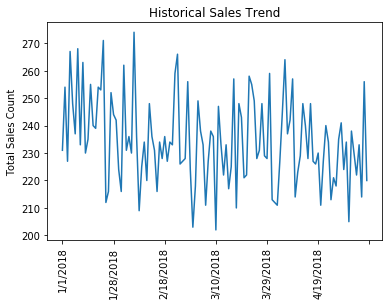

In [150]:
#Date Sales count time series plot
Date_Transaction_Count = dfc.groupby('Date').size()
Date_Transaction_Count.plot(rot=90,title = 'Historical Sales Trend')
plt.ylabel("Total Sales Count")
plt.xlabel(None);

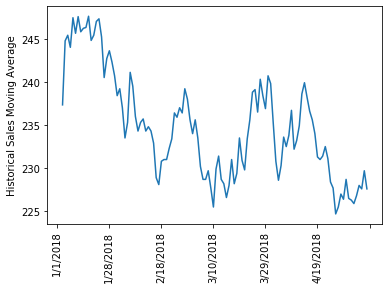

In [151]:
#Moving Average Plot
Date_Count_MovingAverage = Date_Transaction_Count.rolling(10, min_periods=3).mean()
Date_Count_MovingAverage.plot(rot=90)
plt.ylabel('Historical Sales Moving Average')
plt.xlabel(None);

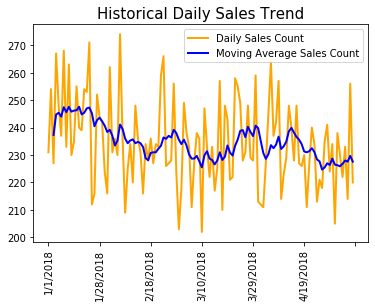

In [152]:
#Moving Average Daily Sales count over Daily Sales Count
Date_Transaction_Count.plot(rot=90,color='orange', linewidth=2, label = "Daily Sales Count")
Date_Count_MovingAverage.plot(rot=90,color='blue', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Historical Daily Sales Trend",size=15)
plt.xlabel(None)
plt.show();

### Time

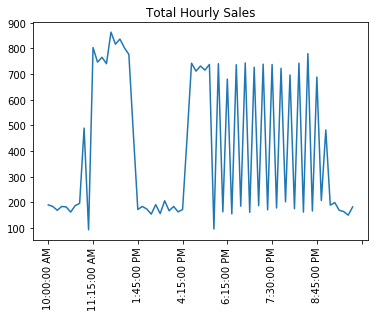

In [153]:
#Daily Hourly Sales Univariate Analysis 
Total_Hourly_Sales_Count = dfc.groupby('Time').size()
Total_Hourly_Sales_Count.plot(rot=90)
plt.xlabel(None)
plt.title('Total Hourly Sales');

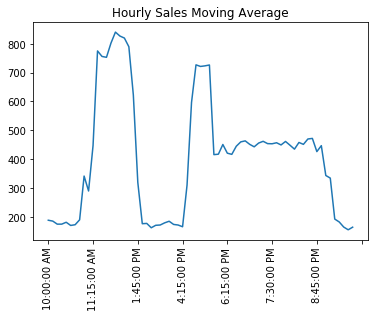

In [154]:
#Moving Average Daily Sales count over Daily Sales Count
#Moving Average Plot
Total_Count_MovingAverage = Total_Hourly_Sales_Count.rolling(2, min_periods=1).mean()
Total_Count_MovingAverage.plot(rot=90)
plt.xlabel(None)
plt.title('Hourly Sales Moving Average');

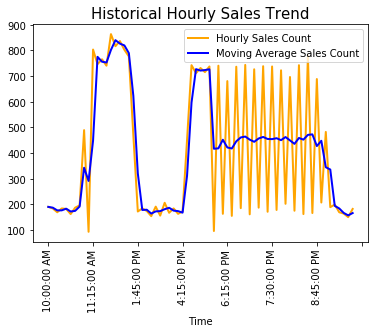

In [155]:
#Moving Average Hourly Sales Trend
Total_Hourly_Sales_Count.plot(rot=90,color='orange', linewidth=2, label = "Hourly Sales Count")
Total_Count_MovingAverage.plot(rot=90,color='blue', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Historical Hourly Sales Trend", size=15)
plt.show();

# Bivariate Explorations

### Location compared to day and time sales counts

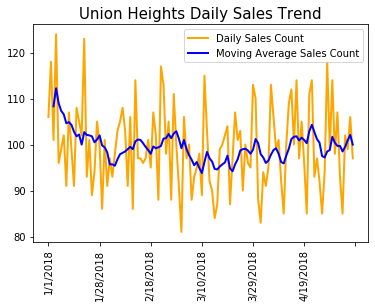

In [156]:
union_heights = dfc[dfc["Location"]=="Union Heights"]
state_street = dfc[dfc["Location"]=="State Street"]

union_sales = union_heights.groupby('Date').size()
union_average = union_sales.rolling(10, min_periods=3).mean()
union_sales.plot(rot=90,color='orange', linewidth=2, label = "Daily Sales Count")
union_average.plot(rot=90,color='blue', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Union Heights Daily Sales Trend", size=15)
plt.xlabel(None)
plt.show();

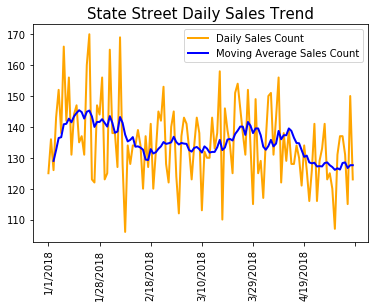

In [157]:
state_sales = state_street.groupby('Date').size()
state_average = state_sales.rolling(10, min_periods=3).mean()
state_sales.plot(rot=90,color='orange', linewidth=2, label = "Daily Sales Count")
state_average.plot(rot=90,color='blue', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("State Street Daily Sales Trend", size=15)
plt.xlabel(None)
plt.show();

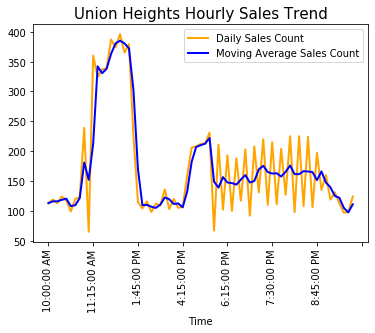

In [158]:
union_sales = union_heights.groupby('Time').size()
union_average = union_sales.rolling(2, min_periods=1).mean()
union_sales.plot(rot=90,color='orange', linewidth=2, label = "Daily Sales Count")
union_average.plot(rot=90,color='blue', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Union Heights Hourly Sales Trend", size=15)
plt.show();

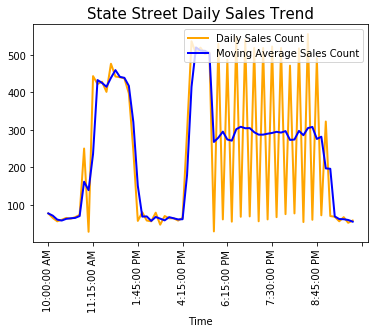

In [159]:
state_sales = state_street.groupby('Time').size()
state_average = state_sales.rolling(2, min_periods=1).mean()
state_sales.plot(rot=90,color='orange', linewidth=2, label = "Daily Sales Count")
state_average.plot(rot=90,color='blue', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("State Street Daily Sales Trend", size=15)
plt.show();

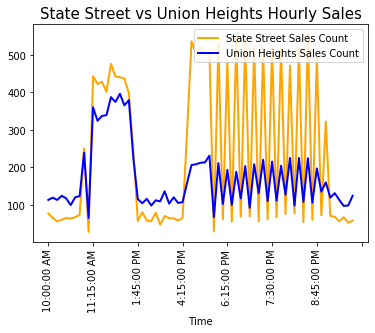

In [160]:
state_sales.plot(rot=90,color='orange', linewidth=2, label = "State Street Sales Count")
union_sales.plot(rot=90,color='blue', linewidth=2, label="Union Heights Sales Count")
plt.legend(loc="upper right")
plt.title("State Street vs Union Heights Hourly Sales", size=15)
plt.show();

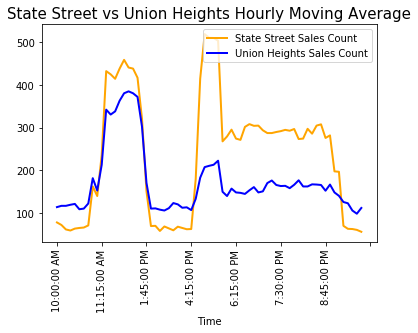

In [161]:
state_average.plot(rot=90,color='orange', linewidth=2, label = "State Street Sales Count")
union_average.plot(rot=90,color='blue', linewidth=2, label="Union Heights Sales Count")
plt.legend(loc="upper right")
plt.title("State Street vs Union Heights Hourly Moving Average", size=15)
plt.show();

# 5. Address Stakeholder Questions and Key Takeaways

### Questions Posed by Initial Query:

1) What is the most popular item at Burgers & Shakeland?

2) Which location is the busiest? Does the answer to this question change throughout the day?

3) A combo meal consists of 1 Burger, 1 Fry, and either a drink or a shake. How many Combo meals were sold from the State Street location in April?

### 1. What is the most popular item at Burgers & Shakeland?

##### Answer: 

Shakes

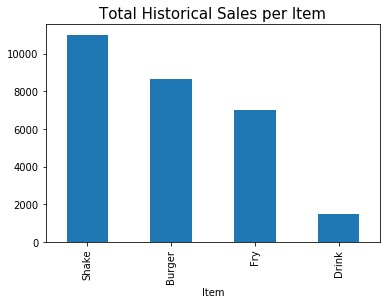

In [162]:
sales_per_employee = dfc.groupby('Item').size().sort_values(ascending=False)
plt.title("Total Historical Sales per Item",size=15)
sales_per_employee.plot(rot=90,kind='bar');

### 2) Which location is the busiest? Does the answer to this question change throughout the day?

###### Answer: 

State Street is the business location. The following visualizations will demonstrate that State Stret's sales are higher. It should be noted that the winner for busiest hour does trade off three times per day at/around hours 11am, 4pm, and 9pm.

##### The order of visualizations which follow are: 

1) Historical Daily Sales Trend

2) Historical Hourly Sales Trend

3) Union Heights Hourly Sales Trend

4) State Street Hourly Sales Trend

5) State Street vs Union Heights Hourly Sales

6) State Street vs Union Heights Hourly Moving Average

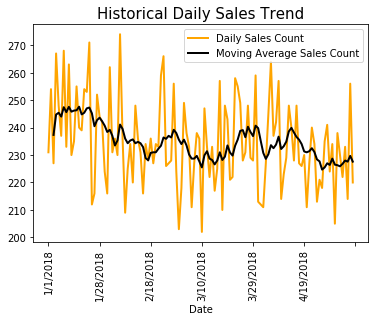

In [163]:
#Moving Average Daily Sales count over Daily Sales Count
Date_Transaction_Count.plot(rot=90,color='orange', linewidth=2, label = "Daily Sales Count")
Date_Count_MovingAverage.plot(rot=90,color='black', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Historical Daily Sales Trend",size=15)
plt.show();

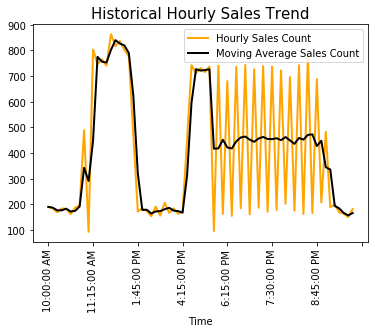

In [164]:
#Moving Average Hourly Sales Trend
Total_Hourly_Sales_Count.plot(rot=90,color='orange', linewidth=2, label = "Hourly Sales Count")
Total_Count_MovingAverage.plot(rot=90,color='black', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Historical Hourly Sales Trend", size=15)
plt.show();

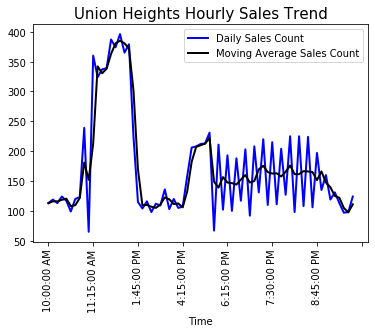

In [165]:
union_sales = union_heights.groupby('Time').size()
union_average = union_sales.rolling(2, min_periods=1).mean()
union_sales.plot(rot=90,color='blue', linewidth=2, label = "Daily Sales Count")
union_average.plot(rot=90,color='black', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper right")
plt.title("Union Heights Hourly Sales Trend", size=15)
plt.show();

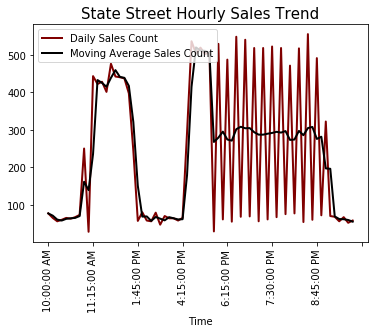

In [166]:
state_sales = state_street.groupby('Time').size()
state_average = state_sales.rolling(2, min_periods=1).mean()
state_sales.plot(rot=90,color='maroon', linewidth=2, label = "Daily Sales Count")
state_average.plot(rot=90,color='black', linewidth=2, label="Moving Average Sales Count")
plt.legend(loc="upper left")
plt.title("State Street Hourly Sales Trend", size=15)
plt.show();

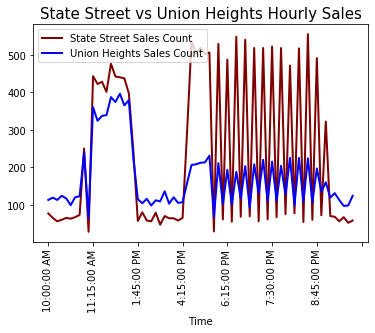

In [167]:
state_sales.plot(rot=90,color='maroon', linewidth=2, label = "State Street Sales Count")
union_sales.plot(rot=90,color='blue', linewidth=2, label="Union Heights Sales Count")
plt.legend(loc="upper left")
plt.title("State Street vs Union Heights Hourly Sales", size=15)
plt.show();

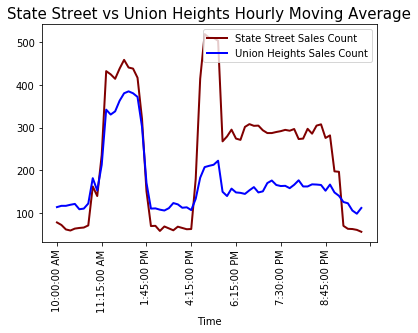

In [168]:
state_average.plot(rot=90,color='maroon', linewidth=2, label = "State Street Sales Count")
union_average.plot(rot=90,color='blue', linewidth=2, label="Union Heights Sales Count")
plt.legend(loc="upper right")
plt.title("State Street vs Union Heights Hourly Moving Average", size=15)
plt.show();

# 3) A combo meal consists of 1 Burger, 1 Fry, and either a drink or a shake. How many Combo meals were sold from the State Street location in April?

##### Answer:

This is a tricky question, as there is not enough data to support the answer of this question within the transaction data. In fact, to assume a relationship between transaction time and item number sold is to commit a fallacy: correlation does not prove causation. Another fallacy which would occur in answering this question would lie in the relationship of item name and item_ID. This would lead to the fallacy of the cart before the horse. This would occur because a relationship would be assumed by variables time, item, and possibly employee name. Just because item_id has in common an instance (time) with another feature (row) does not necessarily mean that the items were rung up together and are therefore a combo. Thust the question is not answerable.

The only way to answer this question with integrity is to re-mine the data source for a more logical variable order number or combo number. Features (rows) could then be grouped by order number and assessed according to stakeholder interest in order to asnwer this question.

##### Attempt at question:

The following is a fallicious answer to the above question in an attempt to show correlations between time, location, and item ordered.

In [172]:
#The below code separates out those sales which occured at the state street location and during april.

state_street_sales = dfc[dfc['Location']=='State Street']
state_street_sales = state_street_sales[state_street_sales['Date'].str.startswith('4/')].sort_values(['Date','Time'])
state_street_sales = state_street_sales[['date_time','Item']]

#The following will return the amount of possible occurances of rows occuring at the same time
#with the stipulation that there are a minimum of 3 items purchased.

dt_group = state_street_sales.groupby('date_time')
count = 0
for key, item in dt_group:
    if (len(dt_group.get_group(key)) >= 3):
        count +=1
count 

657

##### According to the above program, there was a maximum of 657 possible combos (unproven due to fallacy). The only way to say with certainty if items purchased were a combo or not would be the variable order number.